# Final Project For DIS Computational Analysis of Big Data

<h2>Disclaimer</h2>
This is for educational purposes only, it should not be used to draw direct correlations between the data and the results.

Python 3.6 or greater minimum.

Basic Hardware Settings Used:
Intel Core i7 6700HQ @ 2.40GHz, Turbo up to 3.5GHz

Allow at least 2 hours for data processing.

16 GB RAM

Minimum Hardware Settings:
4 Core CPU, 16 GB RAM

Recommended Settings:
8 Core CPU, 32 GB RAM

In [1]:
# References of packages and documentation

# https://github.com/dmarx/psaw
# https://github.com/pushshift/api

# https://www.reddit.com/wiki/search
# https://www.reddit.com/dev/api
# https://www.reddit.com/dev/api#GET_search

# https://redditsearch.io

# https://www.reddit.com/r/askreddit/.json?raw_json=1&limit=1

# Search Url API setting not working at the time of writing, but if fixed, will try some of these
# TheLastLineOfDefense.org
# https://www.reddit.com/search?q=url%3ATheLastLineOfDefense.org

# Time constraints prevented implementatation
# IDEA: User input headline (as string), and check to give score on 'realness'

In [1]:
# Modified function to get N listings of a subreddit,
# returns title of post (The news headline), url source (news organization),
# and the timestamp (date and time posted, in epoch format)

import requests as rq
import re

def getUrl(string):
    if (string is None):
        return "reddit.com"
    u = string
    # Searches string for url, returns source url
    # Example: https://www.cnn.com/article/some-news-story
    # Becomes: cnn.com
    u = re.search('//(.+?)/', string)
    # Handle url not found
    if (u is None):
        return "reddit.com"
    u = u.group(0)
    u = u.strip('/')
    u = u.split('.')
    
    # Catches (Convoluted) for URLs
    if(u[0] != "www" and len(u) == 2):
        u = u[0] + '.' + u[1]
        return u
    elif(u[0] != "www" and len(u) == 3):
        u = u[0] + '.' + u[1] + '.' + u[2]
        return u
    elif(u[0]== "www" and len(u) == 4):
        u = u[1] + '.' + u[2] + '.' + u[3]
        return u
    elif(u[0] == "www" and len(u) == 5):
        u = u[1] + '.' + u[2] + '.' + u[3] + '.' + u[4]
        return u
    # Handle edge case of string len equal to 1
    elif(len(u) == 1):
        return "reddit.com"
    else:
        u = u[1] + '.' + u[2]
        return u

In [2]:
import datetime as dt
import psaw
from psaw import PushshiftAPI

# Time range to grab posts from
start_epoch=int(dt.datetime(2015, 1, 1).timestamp())
end_epoch=int(dt.datetime(2018,6,30).timestamp())
# api package
api = PushshiftAPI()

# See blog post for reasoning behind classification of subreddits

# Reputable subreddits for real news
real = ["news", "wordnews", "politics"]
# Real headlines that sound fake
too_real = ["nottheonion"]

#  Reputable, less directly news related, but has lots of sources
real_optional = ["economics", "environment", "law"]

# Fake headlines, not as obvious sometimes
satire = ["satire", "theonion"]

# American right-biased subreddits
cbias = ["conservative", "republican"]
# American left-biased subreddits
lbias = ["democrats", "liberal"]
# "esist", "NeverTrump"
# Extreme bias subreddits
er = ["The_Donald", "HillaryForPrison"] # Extreme Right
el = ["Impeach_Trump", "Fuckthealtright"] # Extreme Left

extreme_optional = ["Bad_Cop_No_Donut", "copwatch", "Sorosforprison", "conspiracy"] # Mixture

l = []

# Use of API to grab list of submission objects with .filter_keyword attributes
# For example, list item l[0].title returns the title of the post

# for i in range(len(satire)):
#     l.extend(list(api.search_submissions(
#         before=end_epoch,
#         after=start_epoch,
#         subreddit=satire[i],
#         filter=['url','title','created_utc'],
#         limit=10000
#     )))

print(len(l))

0


In [1]:
# This section is for getting urls of reach news list type

import pickle

# Save submission objects to disk
# with open("satireU.txt", "w", encoding='utf-8-sig') as f:
#     for i in range(len(l)):
#         u = getUrl(l[i].url)
#         if (u != "reddit.com" and u != "twitter.com" and u!= "out.reddit.com" and u != "youtube.com" and u != "youtu.be"):
#             f.write(u + "\n")
#         else:
#             continue


# Load submission objects from disk
realU = []
with open("realUrl.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        realU.append(line.strip('\n'))

satireU = []
with open("satireUrl.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        satireU.append(line.strip('\n'))
    
lUrl = []
with open("lUrl.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        lUrl.append(line.strip('\n'))

cUrl = []
with open("cUrl.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        cUrl.append(line.strip('\n'))

erUrl = []
with open("erUrl.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        erUrl.append(line.strip('\n'))
        
elUrl = []
with open("elUrl.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        elUrl.append(line.strip('\n'))

In [4]:
# This section is for getting headlines from each news type

# https://praw.readthedocs.io/en/latest/code_overview/models/submission.html
# https://pypi.org/project/psaw/
# https://github.com/pushshift/api


# Save to file
# with open("satire.txt", "w", encoding='utf-8-sig') as f:
#     for i in range(len(l)):
#         u = getUrl(l[i].url)
#         if (u != "reddit.com" and u != "twitter.com" and u!= "out.reddit.com" and u != "youtube.com" and u != "youtu.be"):
#             f.write(l[i].title + "\n")


# Append to file instead of overwrite

# with open("test.txt", "a",encoding='utf-8-sig') as f:
#     f.write("appended text")


# Get file contents
real = []        
with open("real.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        real.append(line.strip('\n'))
        
satire = []
with open("satire.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        satire.append(line.strip('\n'))

cBias = []
with open("cBias.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        cBias.append(line.strip('\n'))

lBias = []
with open("lBias.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        lBias.append(line.strip('\n'))

erBias = []
with open("erBias.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        erBias.append(line.strip('\n'))

elBias = []
with open("elBias.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        elBias.append(line.strip('\n'))
        
# print(len(real))
print(len(satire))
# print(len(cBias))
# print(len(lBias))

16736


In [5]:
import nltk
from nltk.corpus import stopwords
from langdetect import detect
import validators
from collections import Counter

# Stop words to exclude from Bag of Words Matrix
stop_words = set(stopwords.words('english'))

# Check if string is a number
def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False

# Check if string is url
def isUrl(string):
    try:
        return validators.url(re.search("(?P<url>https?://[^\s]+)", string).group("url"))
    except:
        return False

# Check language of headline, useful to filter only english
# Limiation of project timeline
def getLang(string):
    try:
        l = detect(string)
        return l
    except:
        return "No"

# Main function that returns a master word list and counter objects for
# count of words in headlines for future Machine Learning analysis
def cleanTitle(wordList):
    allWords = []
    wordCount = []
    for title in wordList:
        if(len(title)<=1):
            continue
        if(isUrl(title)):
            continue
        # Check to make sure headline is English for simplicity
        if (getLang(title) == "en"):
            title = title.split()
            # Set words to lowercase and remove them if they are stop words
            words = [w.lower() for w in title if w.lower() not in stop_words]
            # Remove numbers
            words = [w for w in title if not _isnum(w)]
            # Add words to list of all words, and appends count of words of title
            allWords.extend(words)
            wordCount.append(Counter(words))
        else:
            continue
    return allWords, wordCount

In [6]:
# Create master training/testing lists
wordList = []
r, rCount = cleanTitle(real)
for word in r:
    wordList.append(word)
s, sCount = cleanTitle(satire)
for word in s:
    wordList.append(word)
wordList = list(set(wordList))

In [6]:
# Save to file
# with open("wordList.txt", "w", encoding='utf-8-sig') as f:
#     for i in range(len(wordList)):
#         f.write(wordList[i] + "\n")

# Load from file
wordList = []
with open("wordList.txt", "r", encoding='utf-8-sig') as f:
    for line in f:
        wordList.append(line.strip('\n'))

print(len(wordList))

52660


In [4]:
import random
import numpy as np
from collections import Counter
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Returns list of counts of words based on word list
def count(counter,wordList):
    bagItem = []
    try:
        for word in wordList:
            bagItem.append(counter[word])
    except:
        bagItem.append(0)
    return bagItem

In [8]:
# Good for as a whole, not so for an individual title
# rCount = Counter(r)
# sCount = Counter(s)

# rWords = count(rCount, wordList)
# sWords = count(sCount, wordList)

# real = all headlines of real news
# satire = all headlines of satire news
# wordList = set of all words in headlines
# r = all words in real news
# s = all words in satire news
# rCount = count of words in each real title
# sCount = count of words in each satire title

# rWords = list of counts of words in real based on wordList
# sWords = list of counts of words in satire based on wordList

# Creates Bag of Words count for each headline
rWords = []
for c in rCount:
    rWords.append(count(c, wordList))

sWords = []
for c in sCount:
    sWords.append(count(c, wordList))
    
print(len(wordList))

52723


In [14]:
# Create numpy arrays
rPredict = np.array(rWords)
sPredict = np.array(sWords)

In [8]:
# Save numpy array for guessing
# np.save('rPredict.npy', rPredict)
# np.save('sPredict.npy', sPredict)

# Load numpy array
rPredict = np.load('rPredict.npy')
sPredict = np.load('sPredict.npy')

In [ ]:
rPredict = list(rPredict)
sPredict = list(sPredict)

In [16]:
# Adds classification of real/satire news to each instance
for i in range(len(rWords)):
    rWords[i].append(1)
for i in range(len(sWords)):
    sWords[i].append(0)

# Creates master training set
allWords = []
allWords.extend(rWords)
allWords.extend(sWords)
allWords = np.array(allWords)
print(allWords.shape)

(31856, 52661)


In [17]:
# Gets the training/testing(validation) data
x = [i[:-1] for i in allWords]
y = [i[-1] for i in allWords]
x = np.array(x)
y = np.array(y)

In [8]:
# Save numpy array for training
# np.save('x_array.npy', x)
# np.save('y_array.npy', y)

# Load numpy array
# LOAD ONLY IF RE-TRAINING MODEL
x = np.load('x_array.npy')
y = np.load('y_array.npy')

In [9]:
# Initial Model creation and training
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
print(accuracy_score(y, mnb.predict(x)))

0.8776054746358614


In [13]:
from sklearn.externals import joblib

# Save model to disk
# joblib.dump(mnb, 'mnb.pkl')

# Load model from disk
mnb = joblib.load('mnb.pkl')

['mnb.pkl']

In [37]:
model = BernoulliNB()
model.fit(x,y)
# model.predict(x)
# print(accuracy_score(y, model.predict(x)))

In [6]:
from sklearn.externals import joblib

# Save model to disk
# joblib.dump(model, 'model.pkl')

# Load model from disk
model = joblib.load('model.pkl')

In [21]:
print(accuracy_score(y, model.predict(x)))

0.8752197388247112


In [5]:
# Handle get other sources with comparison to the real/satire news
# Takes in a list of submission objects from the Pushshift API
# Returns counter objects for each headline
def cleanOther(theList):
    wordCount = []
    for title in theList:
        if(len(title)<=1):
            continue
        if(isUrl(title)):
            continue
        # Check to make sure headline is English for simplicity
        if (getLang(title) == "en"):
            title = title.split()
            # Set words to lowercase and remove them if they are stop words or not in master word list
            words = [w.lower() for w in title if w.lower() not in stop_words]
            words = [w.lower() for w in title if w.lower() not in wordList]
            # Remove numbers
            words = [w for w in title if not _isnum(w)]
            # Add words to list of all words, and appends count of words of title
            wordCount.append(Counter(words))
        else:
            continue
    return wordCount

In [11]:
# Prediction Model
model.predict(rPredict)
rP = model.predict_proba(rPredict)[:,1]
model.predict(sPredict)
sP = model.predict_proba(sPredict)[:,1]

In [12]:
# Create counter objects
cCount = cleanOther(cBias)
lCount = cleanOther(lBias)

cWords = []
for c in cCount:
    cWords.append(count(c,wordList))

lWords = []
for c in lCount:
    lWords.append(count(c,wordList))

In [13]:
cPredict = np.array(cWords)
lPredict = np.array(lWords)

In [14]:
# Save numpy array for guessing
# np.save('cPredict.npy', cPredict)
# np.save('lPredict.npy', lPredict)

# Load numpy array
cPredict = np.load('cPredict.npy')
lPredict = np.load('lPredict.npy')

In [15]:
print(model.predict(cPredict))
model.predict(cPredict)
cP = model.predict_proba(cPredict)[:,1]
model.predict(lPredict)
lP = model.predict_proba(lPredict)[:,1]
print(cP[0:10])

[1 1 1 ... 0 1 0]
[0.97684649 0.99996381 0.99999992 0.9997409  0.99431583 0.04319447
 0.99403167 0.99996748 0.99994234 0.00405255]


In [16]:
erCount = cleanOther(erBias)
elCount = cleanOther(elBias)

erWords = []
for c in erCount:
    erWords.append(count(c,wordList))

elWords = []
for c in elCount:
    elWords.append(count(c,wordList))
    

In [17]:
erPredict = np.array(erWords)
elPredict = np.array(elWords)

In [18]:
# Save numpy array for guessing
# np.save('erPredict.npy', erPredict)
# np.save('elPredict.npy', elPredict)

# Load numpy array
erPredict = np.load('erPredict.npy')
elPredict = np.load('elPredict.npy')

In [19]:
print(model.predict(erPredict))
model.predict(erPredict)
erP = model.predict_proba(erPredict)[:,1]
model.predict(elPredict)
elP = model.predict_proba(elPredict)[:,1]

[1 1 1 ... 1 1 0]


In [20]:
# TOP NEWS SOURCE
cBiasU = []
for s in cUrl:
    cBiasU.append(s)

lBiasU = []
for s in lUrl:
    lBiasU.append(s)

print(len(cBiasU))
print(len(lBiasU))

16060
13971


In [21]:
# TOP NEWS SOURCE

cUrlCount = Counter(cBiasU)
lUrlCount = Counter(lBiasU)

cUMost = list(cUrlCount.most_common(10))
lUMost = list(lUrlCount.most_common(10))

cx = []
cy = []
for i in range(len(cUMost)):
    cx.append(cUMost[i][0])
    cy.append(cUMost[i][1])

lx = []
ly = []
for i in range(len(lUMost)):
    lx.append(lUMost[i][0])
    ly.append(lUMost[i][1])

In [22]:
# TOP NEWS SOURCE
rU = []
sU = []
for s in realU:
    rU.append(s)
for s in satireU:
    sU.append(s)
    
print(len(rU))
print(len(sU))

18229
10434


In [23]:
# TOP NEWS SOURCE
rUCount = Counter(rU)
sUCount = Counter(sU)

rUTop = list(rUCount.most_common(10))
sUTop = list(sUCount.most_common(10))

rx = []
ry = []
for i in range(len(rUTop)):
    rx.append(rUTop[i][0])
    ry.append(rUTop[i][1])

sx = []
sy = []
for i in range(len(sUTop)):
    sx.append(sUTop[i][0])
    sy.append(sUTop[i][1])
    

In [2]:
# TOP NEWS SOURCE
erU = []
elU = []

for s in erUrl:
    erU.append(s)
for s in elUrl:
    elU.append(s)

In [6]:
# TOP NEWS SOURCE
erCount = Counter(erU)
elCount = Counter(elU)

erUTop = list(erCount.most_common(10))
elUTop = list(elCount.most_common(10))

erx = []
ery = []
for i in range(len(erUTop)):
    erx.append(erUTop[i][0])
    ery.append(erUTop[i][1])

elx = []
ely = []
for i in range(len(elUTop)):
    elx.append(elUTop[i][0])
    ely.append(elUTop[i][1])



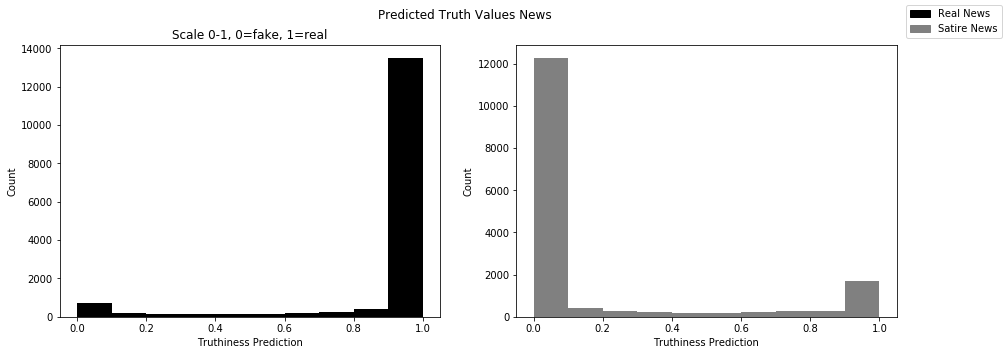

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


black_patch = mpatches.Patch(color='black', label='Real News')
grey_patch = mpatches.Patch(color='grey', label='Satire News')


fig = plt.figure(figsize=(15,5))
fig.legend(handles=[black_patch, grey_patch])
plt.subplot(1,2,1)
plt.suptitle("Predicted Truth Values News")
plt.title("Scale 0-1, 0=fake, 1=real")
plt.hist(rP, color='black')
plt.ylabel("Count")
plt.xlabel("Truthiness Prediction")
plt.subplot(1,2,2)
plt.hist(sP, color='grey')
#plt.yticks([])
plt.ylabel("Count")
plt.xlabel("Truthiness Prediction")
plt.show()


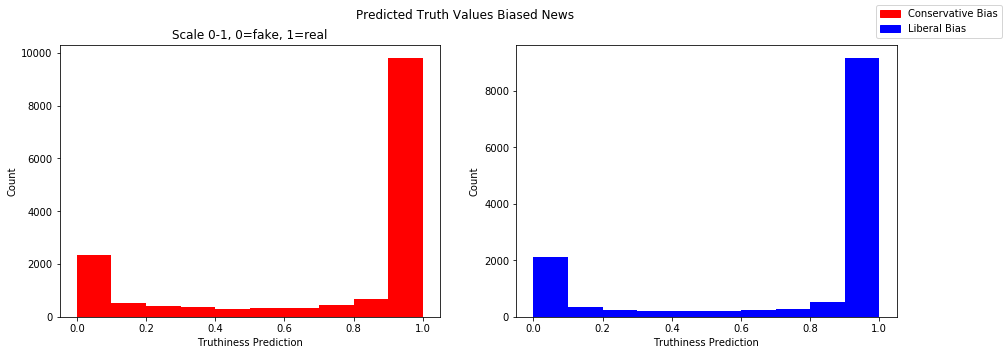

In [28]:
# Comparison of biased news sources

red_patch = mpatches.Patch(color='red', label='Conservative Bias')
blue_patch = mpatches.Patch(color='blue', label='Liberal Bias')

fig = plt.figure(figsize=(15,5))
fig.legend(handles=[red_patch, blue_patch])
plt.subplot(1,2,1)
plt.suptitle("Predicted Truth Values Biased News")
plt.title("Scale 0-1, 0=fake, 1=real")
plt.hist(cP, color='red')
plt.ylabel("Count")
plt.xlabel("Truthiness Prediction")
plt.subplot(1,2,2)
plt.hist(lP, color='blue')
#plt.yticks([])
plt.ylabel("Count")
plt.xlabel("Truthiness Prediction")
plt.show()

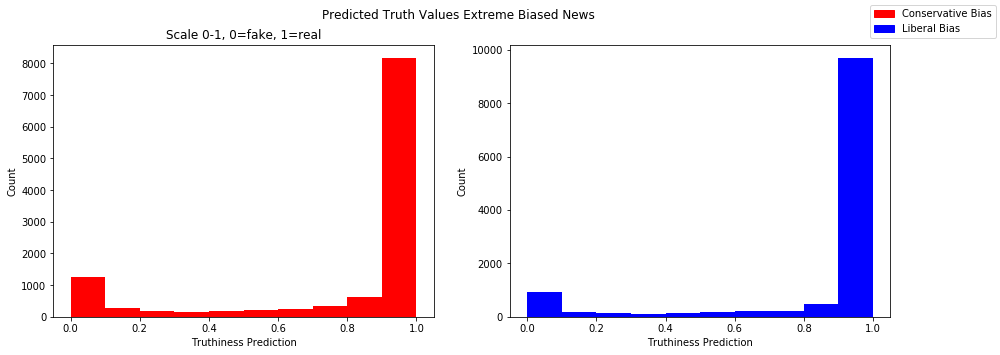

In [29]:
# Comparison of Extremely biased news sources

fig = plt.figure(figsize=(15,5))
fig.legend(handles=[red_patch, blue_patch])
plt.subplot(1,2,1)
plt.suptitle("Predicted Truth Values Extreme Biased News")
plt.title("Scale 0-1, 0=fake, 1=real")
plt.hist(erP, color='red')
plt.ylabel("Count")
plt.xlabel("Truthiness Prediction")
plt.subplot(1,2,2)
plt.hist(elP, color='blue')
plt.ylabel("Count")
#plt.yticks([])
plt.xlabel("Truthiness Prediction")
plt.show()

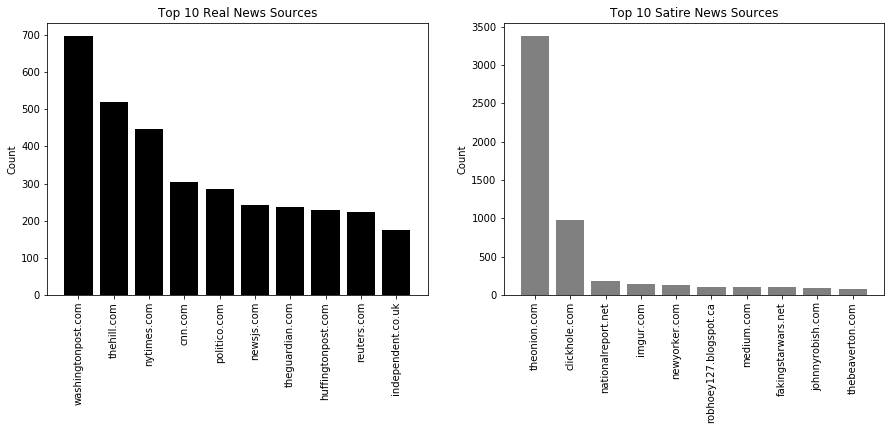

In [30]:
# Comparison of News Sources

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Top 10 Real News Sources")
plt.bar(rx, ry, color='black')
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Top 10 Satire News Sources")
plt.bar(sx, sy, color='grey')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

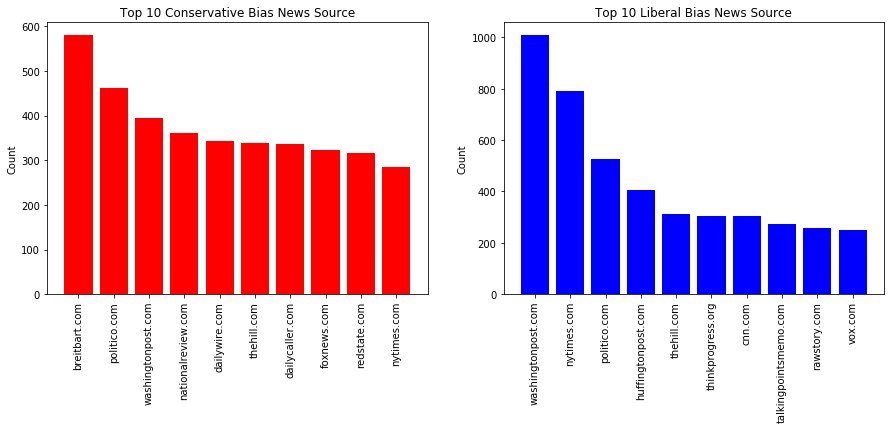

In [31]:
# Comparison of top biased news sources

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Top 10 Conservative Bias News Source")
plt.bar(cx, cy, color='red')
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Top 10 Liberal Bias News Source")
plt.bar(lx, ly, color='blue')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

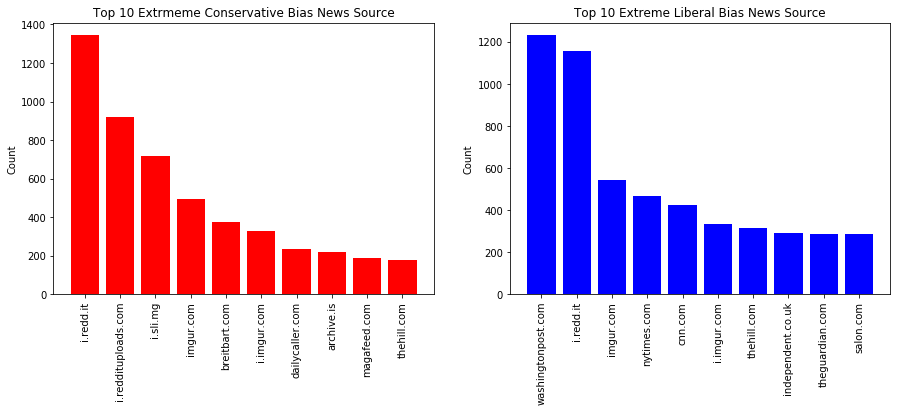

In [9]:
# Comparison of Top Extremely biased news sources
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Top 10 Extrmeme Conservative Bias News Source")
plt.bar(erx, ery, color='red')
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Top 10 Extreme Liberal Bias News Source")
plt.bar(elx, ely, color='blue')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [36]:
# Input Analysis for User Inputted Title

userTitle = input('Enter your input:')
userList = []
userList.append(userTitle)
print(userList)
userCount = cleanOther(userList)
print(userCount)
userWords = []
for c in userCount:
    userWords.append(count(c,wordList))

userWords = np.array(userWords)
print(userWords)
print(model.predict_proba(userWords)[:,1])
print(model.predict(userWords))


['Political Scientists Baffled By Trump’s Ability To End Something He Had No Control Over Just Days Ago']
[Counter({'Political': 1, 'Scientists': 1, 'Baffled': 1, 'By': 1, 'Trump’s': 1, 'Ability': 1, 'To': 1, 'End': 1, 'Something': 1, 'He': 1, 'Had': 1, 'No': 1, 'Control': 1, 'Over': 1, 'Just': 1, 'Days': 1, 'Ago': 1})]
[[0 0 0 ... 0 0 0]]
[2.97284137e-09]
[0]
